# ShaoXing Sample Usage

In [ ]:
import ShaoXing
from ZhongShan import *

import pandas as pd
import pickle

In [93]:
shaoxing = ShaoXing.ShaoXing()

### Import, Prepare data and Read in

In [92]:
full_data = pd.read_csv('../data/curated/modelling/N_Full_3.csv')
train_data = pd.read_csv('../data/curated/modelling/N_Train_3.csv')
val_data = pd.read_csv('../data/curated/modelling/N_Validate_3.csv')
test_data = pd.read_csv('../data/curated/modelling/N_Test_3.csv')


In [95]:
# Open sanmin object so it we could load features etc
with open(f'../models/AFL_pipeline_N.pickle', 'rb') as f:
    sanmin = pickle.load(f)
    
model3_COLS = sanmin.final_features['3']
# model2_COLS = sanmin.final_features['2']
# model1_COLS = sanmin.final_features['1']

model3_COLS = [x for x in model3_COLS if x not in ['3', '2', '1']]
# model2_COLS = [x for x in model2_COLS if x not in ['3', '2', '1']]
# model1_COLS = [x for x in model1_COLS if x not in ['3', '2', '1']]

In [45]:
shaoxing.read_in_features_label(model3_COLS, '3')

In [46]:
shaoxing.read_in_full_train_test_data(full_data, train_data, val_data, test_data)

Full Data read in successfully
Train Data read in successfully
Validation Data read in successfully
Test Data read in successfully


### Read in model and optimal hyperparameters

In [47]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [48]:
gbr = GBR
params = {'learning_rate':0.01, 
    'n_estimators':200, 
    'subsample' : 0.5, 
    'max_features':0.5, 
    'ccp_alpha':0, 
    'max_depth':5, 
    'random_state' : 19260817}

In [49]:
with open('../models/final_models/model3.pickle', 'rb') as f:
    model = pickle.load(f)

In [ ]:
# Read in fitted model
shaoxing.read_in_fitted_model(model, 'Regression', 'Sklearn Tree', 'XGB 3 Votes')

Successfully read in fitted model GradientBoostingRegressor(ccp_alpha=0, learning_rate=0.01, max_depth=5,
                          max_features=0.5, n_estimators=200,
                          random_state=19260817, subsample=0.5), which is a Regression model


Demonstration for reading in Untrained Model

In [ ]:
# # Read in unfitted model
# shaoxing.read_in_untrained_model(gbr, params, 'Regression')

In [ ]:
# # Fit model with train data and tuned hyperparameters on the fly
# shaoxing.fit_model()

### Run summaries

Features  Importance
4                 Disposals BTN    0.137435
6                     Goals BTN    0.126880
5                 Disposals OTN    0.081044
16      Effective Disposals BTN    0.057097
22       Score Involvements BTN    0.046285
7                     Goals OTN    0.040683
12    Contested Possessions BTN    0.032857
27           Behind Assists BTN    0.031886
8                Inside 50s BTN    0.028910
20      Stoppage Clearances BTN    0.025294
15  Uncontested Possessions OTN    0.025237
17      Effective Disposals OTN    0.023715
21      Stoppage Clearances OTN    0.022332
10               Clearances BTN    0.022153
13    Contested Possessions OTN    0.020666
23       Score Involvements OTN    0.020376
11               Clearances OTN    0.019345
24            Metres Gained BTN    0.019221
18        Centre Clearances BTN    0.019055
26                Turnovers OTN    0.018634
9                Inside 50s OTN    0.018497
0                     Kicks BTN    0.018364
28           Behind Assists OTN    0.017885
3                 Handballs OTN    0.017122
14  Uncontested Possessions BTN    0.016969
30    Ineffective Disposals OTN    0.016914
1                     Kicks OTN    0.016477
2                 Handballs BTN    0.016445
25            Metres Gained OTN    0.015412
29    Ineffective Disposals BTN    0.015209
19        Centre Clearances OTN    0.011596

/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_10542/3341320753.py:669: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.feature_importance_df['Features'], rotation = 90);


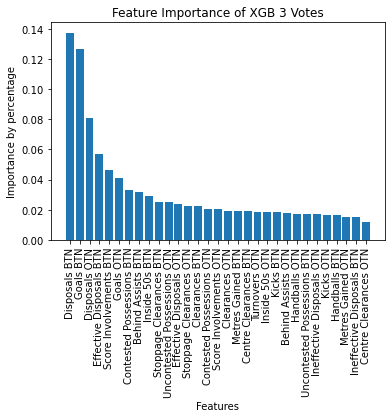

In [ ]:
# Get feature importance
shaoxing.get_feature_importance()

In [ ]:
# Calculates and displays summary stats for all three data sets, including graphs and CV data
# Save t output address using optional input
shaoxing.get_analysis('./test')

Train  Validation       Test
R2               0.2221      0.1286     0.1196
RMSE             0.1312      0.1389     0.1397
Q4 n 1       40436.0000   8675.0000  8665.0000
Q4 n 2           0.0000      0.0000     0.0000
Q4 n 3           0.0000      0.0000     0.0000
Q4 n 4         937.0000    201.0000   201.0000
Q4 R2 1          0.0000      0.0000     0.0000
Q4 R2 2             NaN         NaN        NaN
Q4 R2 3             NaN         NaN        NaN
Q4 R2 4          0.0000      0.0000     0.0000
Q4 RMSE 1        0.0409      0.0449     0.0450
Q4 RMSE 2           NaN         NaN        NaN
Q4 RMSE 3           NaN         NaN        NaN
Q4 RMSE 4        0.8295      0.8745     0.8793
Q10 n 1      40436.0000   8675.0000  8665.0000
Q10 n 2          0.0000      0.0000     0.0000
Q10 n 3          0.0000      0.0000     0.0000
Q10 n 4          0.0000      0.0000     0.0000
Q10 n 5          0.0000      0.0000     0.0000
Q10 n 6          0.0000      0.0000     0.0000
Q10 n 7          0.0000      0.0000     0.0000
Q10 n 8          0.0000      0.0000     0.0000
Q10 n 9          0.0000      0.0000     0.0000
Q10 n 10       937.0000    201.0000   201.0000
Q10 R2 1         0.0000      0.0000     0.0000
Q10 R2 2            NaN         NaN        NaN
Q10 R2 3            NaN         NaN        NaN
Q10 R2 4            NaN         NaN        NaN
Q10 R2 5            NaN         NaN        NaN
Q10 R2 6            NaN         NaN        NaN
Q10 R2 7            NaN         NaN        NaN
Q10 R2 8            NaN         NaN        NaN
Q10 R2 9            NaN         NaN        NaN
Q10 R2 10        0.0000      0.0000     0.0000
Q10 RMSE 1       0.0409      0.0449     0.0450
Q10 RMSE 2          NaN         NaN        NaN
Q10 RMSE 3          NaN         NaN        NaN
Q10 RMSE 4          NaN         NaN        NaN
Q10 RMSE 5          NaN         NaN        NaN
Q10 RMSE 6          NaN         NaN        NaN
Q10 RMSE 7          NaN         NaN        NaN
Q10 RMSE 8          NaN         NaN        NaN
Q10 RMSE 9          NaN         NaN        NaN
Q10 RMSE 10      0.8295      0.8745     0.8793

CV Train   CV Test
CV R2    0.215710  0.117109
CV RMSE  0.131764  0.139771

Train Residual Plots
Val Residual Plots
Test Residual Plots


/var/folders/xg/8w_3dndd6l5c3n99vd7vd3f40000gn/T/ipykernel_10542/3341320753.py:289: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [ ]:
# export residual plots
shaoxing.export_residual_plot('Kicks BTN', 'Train', 'test_data')

In [ ]:
# display just model stats (no plots)
shaoxing.display_model_stats()

Train  Validation       Test
R2               0.2221      0.1286     0.1196
RMSE             0.1312      0.1389     0.1397
Q4 n 1       40436.0000   8675.0000  8665.0000
Q4 n 2           0.0000      0.0000     0.0000
Q4 n 3           0.0000      0.0000     0.0000
Q4 n 4         937.0000    201.0000   201.0000
Q4 R2 1          0.0000      0.0000     0.0000
Q4 R2 2             NaN         NaN        NaN
Q4 R2 3             NaN         NaN        NaN
Q4 R2 4          0.0000      0.0000     0.0000
Q4 RMSE 1        0.0409      0.0449     0.0450
Q4 RMSE 2           NaN         NaN        NaN
Q4 RMSE 3           NaN         NaN        NaN
Q4 RMSE 4        0.8295      0.8745     0.8793
Q10 n 1      40436.0000   8675.0000  8665.0000
Q10 n 2          0.0000      0.0000     0.0000
Q10 n 3          0.0000      0.0000     0.0000
Q10 n 4          0.0000      0.0000     0.0000
Q10 n 5          0.0000      0.0000     0.0000
Q10 n 6          0.0000      0.0000     0.0000
Q10 n 7          0.0000      0.0000     0.0000
Q10 n 8          0.0000      0.0000     0.0000
Q10 n 9          0.0000      0.0000     0.0000
Q10 n 10       937.0000    201.0000   201.0000
Q10 R2 1         0.0000      0.0000     0.0000
Q10 R2 2            NaN         NaN        NaN
Q10 R2 3            NaN         NaN        NaN
Q10 R2 4            NaN         NaN        NaN
Q10 R2 5            NaN         NaN        NaN
Q10 R2 6            NaN         NaN        NaN
Q10 R2 7            NaN         NaN        NaN
Q10 R2 8            NaN         NaN        NaN
Q10 R2 9            NaN         NaN        NaN
Q10 R2 10        0.0000      0.0000     0.0000
Q10 RMSE 1       0.0409      0.0449     0.0450
Q10 RMSE 2          NaN         NaN        NaN
Q10 RMSE 3          NaN         NaN        NaN
Q10 RMSE 4          NaN         NaN        NaN
Q10 RMSE 5          NaN         NaN        NaN
Q10 RMSE 6          NaN         NaN        NaN
Q10 RMSE 7          NaN         NaN        NaN
Q10 RMSE 8          NaN         NaN        NaN
Q10 RMSE 9          NaN         NaN        NaN
Q10 RMSE 10      0.8295      0.8745     0.8793

CV Train   CV Test
CV R2    0.215710  0.117109
CV RMSE  0.131764  0.139771